# EDA — Telco Customer Churn (Лабораторна №1)

Цей ноутбук покриває первинний аналіз даних (EDA) для датасету **Telco Customer Churn**.

Що тут є:
- завантаження CSV
- перевірка типів даних, пропусків, дублікатів
- базове очищення (типова проблема `TotalCharges`)
- візуалізація цільової змінної `Churn`
- аналіз числових і категоріальних ознак
- кореляційна матриця (для числових)
- короткі висновки для переходу до `train.py`


## 1. Імпорт бібліотек

In [1]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    HAS_SEABORN = True
except ImportError:
    HAS_SEABORN = False

plt.rcParams["figure.figsize"] = (10, 5)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)


Matplotlib is building the font cache; this may take a moment.


## 2. Завантаження датасету

In [2]:
DATA_PATH = Path("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

if DATA_PATH is None:
    raise FileNotFoundError(
        "CSV не знайдено. Поклади файл у data/raw/ або задай DATA_PATH вручну."
    )

df = pd.read_csv(DATA_PATH)
print(f"✅ Дані завантажено з: {DATA_PATH.resolve()}")
df.head()


✅ Дані завантажено з: /Users/ivanka/Documents/UNIVER/Semester8/Lab1_arhitecture/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Швидкий огляд даних

In [3]:
print("Shape:", df.shape)
print("\nКолонки:")
display(pd.DataFrame({"column": df.columns, "dtype": df.dtypes.astype(str)}))

print("\nПерші рядки:")
display(df.head(10))


Shape: (7043, 21)

Колонки:


,column,dtype
customerID,customerID,object
gender,gender,object
SeniorCitizen,SeniorCitizen,int64
Partner,Partner,object
Dependents,Dependents,object
tenure,tenure,int64
PhoneService,PhoneService,object
MultipleLines,MultipleLines,object
InternetService,InternetService,object
OnlineSecurity,OnlineSecurity,object



Перші рядки:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
print("INFO:")
df.info()

print("\nОпис числових колонок:")
display(df.describe().T)

print("\nОпис усіх колонок:")
display(df.describe(include="all").T)


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   ob

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75



Опис усіх колонок:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Загальна структура даних

- Датасет містить **7043 рядки** та **21 колонку**.
- Більшість ознак є **категоріальними**, що добре підходить для задачі churn prediction після кодування.
- Колонка `TotalCharges` на цьому етапі має тип `object`, хоча за змістом є числовою — це типовий кейс для Telco Customer Churn і потребує очищення перед навчанням моделі.
- `customerID` є ідентифікатором клієнта і не несе прогнозної цінності як ознака для моделі.

## 4. Базове очищення (специфіка Telco)

Типові проблеми:
- пробіли в текстових значеннях
- `TotalCharges` може бути типу `object`
- порожні рядки замість пропусків


In [5]:
df_clean = df.copy()

# 1) Прибираємо пробіли в назвах колонок
df_clean.columns = [c.strip() for c in df_clean.columns]

# 2) Для текстових колонок: обрізаємо пробіли
obj_cols = df_clean.select_dtypes(include="object").columns.tolist()
for col in obj_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# 3) Замінюємо порожні рядки на NaN
df_clean = df_clean.replace(r"^\s*$", np.nan, regex=True)

# 4) Конвертація TotalCharges у numeric (якщо є)
if "TotalCharges" in df_clean.columns:
    df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

print("✅ Базове очищення виконано")
display(df_clean.head())
display(pd.DataFrame({"column": df_clean.columns, "dtype": df_clean.dtypes.astype(str)}))


✅ Базове очищення виконано


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,column,dtype
customerID,customerID,object
gender,gender,object
SeniorCitizen,SeniorCitizen,int64
Partner,Partner,object
Dependents,Dependents,object
tenure,tenure,int64
PhoneService,PhoneService,object
MultipleLines,MultipleLines,object
InternetService,InternetService,object
OnlineSecurity,OnlineSecurity,object


### Результати базового очищення

- Виконано нормалізацію текстових значень (обрізано зайві пробіли).
- Порожні рядки замінено на `NaN`.
- `TotalCharges` успішно перетворено у числовий формат (`float64`), що дозволяє використовувати цю ознаку в статистичному аналізі та моделюванні.
- На цьому етапі дані приведено до формату, придатного для подальшого EDA.

## 5. Пропуски та дублікати

In [6]:
missing = df_clean.isna().sum().sort_values(ascending=False)
missing_pct = (df_clean.isna().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct.round(2)
})

print("Пропуски по колонках:")
display(missing_df[missing_df["missing_count"] > 0])

print(f"\nКількість повних дублікатів рядків: {df_clean.duplicated().sum()}")

if "customerID" in df_clean.columns:
    print(f"Дублікатів customerID: {df_clean['customerID'].duplicated().sum()}")


Пропуски по колонках:


,missing_count,missing_pct
TotalCharges,11,0.16



Кількість повних дублікатів рядків: 0
Дублікатів customerID: 0


### Рішення для пропусків (для EDA)

На етапі EDA ми **не обов'язково** робимо фінальну імпутацію, але корисно:
- зрозуміти де є пропуски
- зафіксувати рішення для `train.py`

> Для Telco часто пропуски в `TotalCharges` з'являються у клієнтів з дуже малим `tenure`.


In [7]:
# Дивимось рядки з пропусками (якщо є)
if df_clean.isna().sum().sum() > 0:
    display(df_clean[df_clean.isna().any(axis=1)].head(20))
else:
    print("Пропусків немає ✅")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Пропуски та дублікати

- Виявлено лише **11 пропусків (0.16%)** і всі вони знаходяться у колонці `TotalCharges`.
- Повних дублікатів рядків немає, дублікатів `customerID` також немає.
- Пропуски в `TotalCharges` зустрічаються у клієнтів із `tenure = 0`, що логічно (нові клієнти ще не накопичили сумарних нарахувань).
- Для моделювання ці пропуски можна:
  - або імпутувати (наприклад, медіаною),
  - або обробити в pipeline через `SimpleImputer`.

## 6. Цільова змінна (`Churn`)

Target column: Churn


,count,pct
Churn,,
No,5174,73.46
Yes,1869,26.54


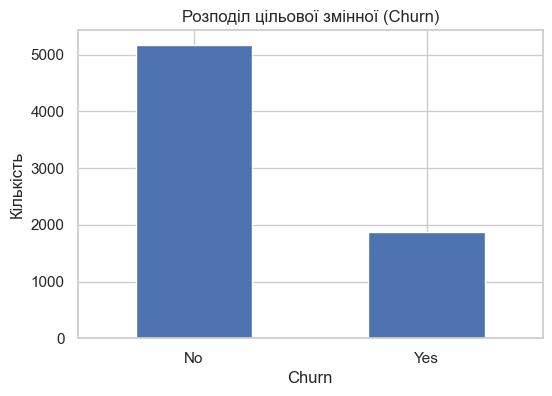

In [8]:
# Пошук цільової колонки
target_candidates = [c for c in df_clean.columns if c.lower() == "churn"]
if not target_candidates:
    raise ValueError("Колонку 'Churn' не знайдено.")
target_col = target_candidates[0]
print("Target column:", target_col)

target_counts = df_clean[target_col].value_counts(dropna=False)
target_pct = (df_clean[target_col].value_counts(normalize=True, dropna=False) * 100).round(2)

display(pd.DataFrame({"count": target_counts, "pct": target_pct}))

plt.figure(figsize=(6,4))
target_counts.plot(kind="bar")
plt.title("Розподіл цільової змінної (Churn)")
plt.xlabel(target_col)
plt.ylabel("Кількість")
plt.xticks(rotation=0)
plt.show()


### Цільова змінна `Churn`

- Розподіл класів:
  - `No` — **5174 (73.46%)**
  - `Yes` — **1869 (26.54%)**
- Маємо **помірний дисбаланс класів**, тому для оцінки моделі недостатньо лише `accuracy`.
- У наступному етапі доцільно використовувати також:
  - `f1-score`
  - `precision`
  - `recall`
  - (за потреби) `roc_auc`

## 7. Типи ознак: числові та категоріальні

In [9]:
# Часто customerID не є корисною ознакою для моделі (це ідентифікатор)
id_like_cols = [c for c in df_clean.columns if c.lower() in ["customerid", "id"]]
print("ID-подібні колонки:", id_like_cols)

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()

# Прибираємо target та ID з оглядових списків (для зручності аналізу)
numeric_feature_cols = [c for c in numeric_cols if c != target_col]
categorical_feature_cols = [c for c in categorical_cols if c != target_col and c not in id_like_cols]

print(f"Кількість числових ознак: {len(numeric_feature_cols)}")
print(f"Кількість категоріальних ознак: {len(categorical_feature_cols)}")

print("\nЧислові ознаки:", numeric_feature_cols)
print("\nКатегоріальні ознаки:", categorical_feature_cols)


ID-подібні колонки: ['customerID']
Кількість числових ознак: 4
Кількість категоріальних ознак: 15

Числові ознаки: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Категоріальні ознаки: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Типи ознак

- Для моделювання використовується змішаний набір ознак:
  - **4 числові**: `SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`
  - **15 категоріальних** ознак
- `customerID` визначено як ID-колонку, її потрібно виключити перед навчанням.
- Оскільки ознаки змішані, у `train.py` доцільно використати `ColumnTransformer`:
  - числові → імпутація
  - категоріальні → імпутація + `OneHotEncoder`

## 8. Аналіз числових ознак

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


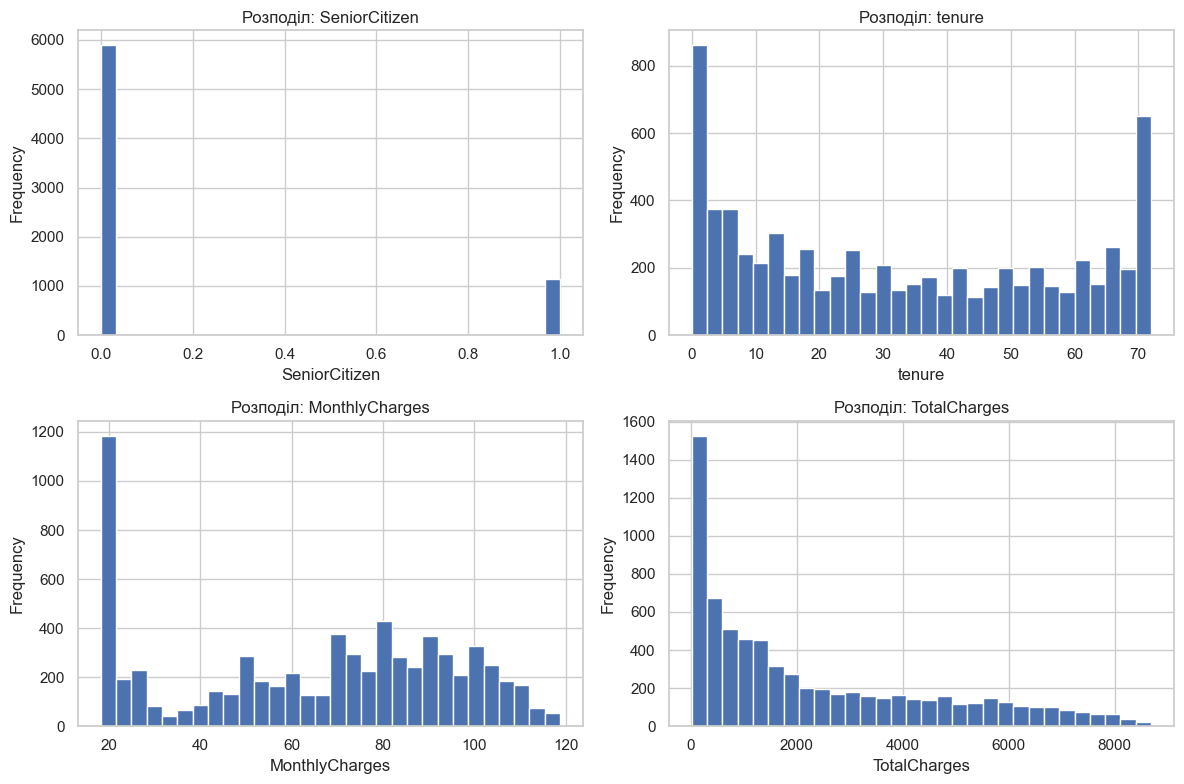

In [10]:
if numeric_feature_cols:
    display(df_clean[numeric_feature_cols].describe().T)

    # Гістограми
    n = len(numeric_feature_cols)
    ncols = 2
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4*nrows))
    axes = np.array(axes).reshape(-1)

    for ax, col in zip(axes, numeric_feature_cols):
        df_clean[col].dropna().plot(kind="hist", bins=30, ax=ax)
        ax.set_title(f"Розподіл: {col}")
        ax.set_xlabel(col)
    for ax in axes[n:]:
        ax.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("Числових ознак не знайдено.")


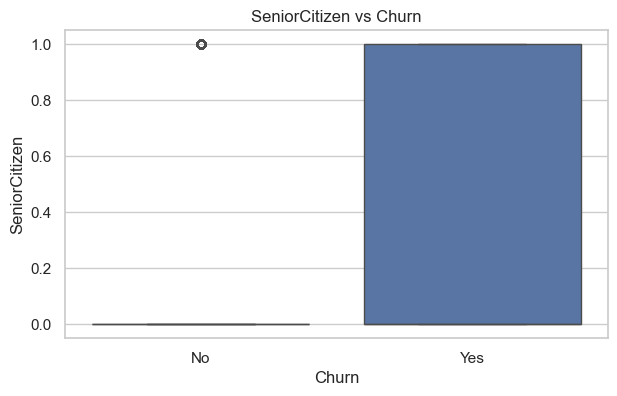

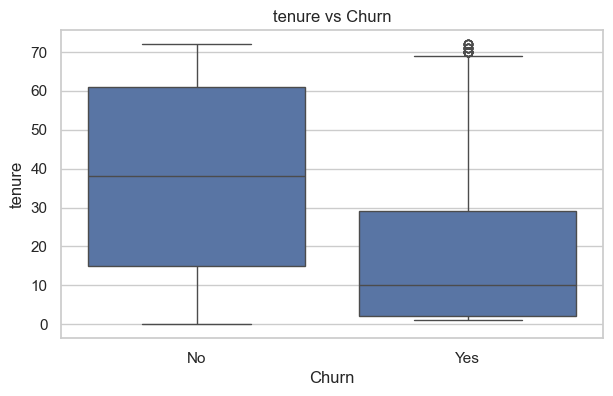

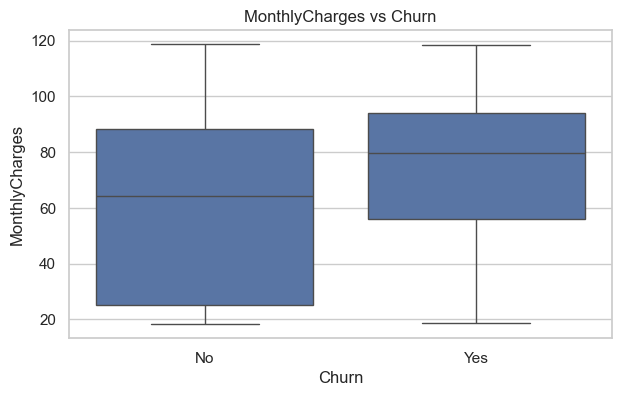

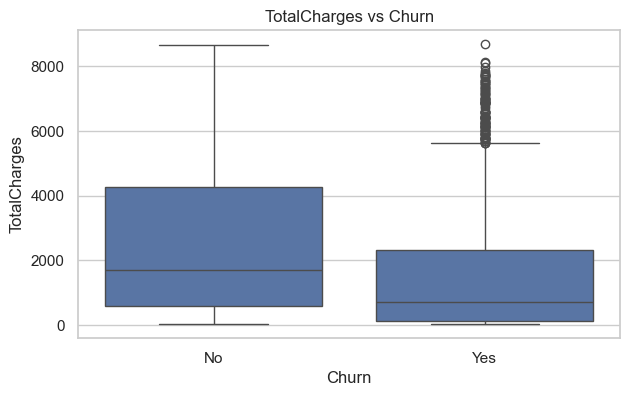

In [11]:
# Boxplot числових ознак у розрізі Churn (якщо target бінарний Yes/No)
if numeric_feature_cols and target_col in df_clean.columns:
    for col in numeric_feature_cols:
        plt.figure(figsize=(7,4))
        if HAS_SEABORN:
            sns.boxplot(data=df_clean, x=target_col, y=col)
        else:
            groups = [g[col].dropna().values for _, g in df_clean.groupby(target_col)]
            labels = list(df_clean[target_col].dropna().unique())
            plt.boxplot(groups, labels=labels)
            plt.xlabel(target_col)
            plt.ylabel(col)
        plt.title(f"{col} vs {target_col}")
        plt.show()


### Числові ознаки

За графіками видно такі тенденції:

- **`tenure`**: у клієнтів з `Churn = Yes` стаж користування зазвичай нижчий, ніж у клієнтів з `Churn = No`.
- **`MonthlyCharges`**: у клієнтів з відтоком значення часто дещо вищі.
- **`TotalCharges`**: у клієнтів з `Churn = Yes` сумарні нарахування зазвичай нижчі, що узгоджується з меншим `tenure`.
- **`SeniorCitizen`** — бінарна ознака (0/1), її варто інтерпретувати обережно; у моделі вона може бути корисною, але не як безперервна змінна.

Отже, `tenure`, `MonthlyCharges` та `TotalCharges` виглядають потенційно важливими предикторами churn.

## 9. Аналіз категоріальних ознак

In [12]:
# Кількість унікальних значень у категоріальних
if categorical_feature_cols:
    cat_unique = pd.DataFrame({
        "column": categorical_feature_cols,
        "n_unique": [df_clean[c].nunique(dropna=False) for c in categorical_feature_cols]
    }).sort_values("n_unique")
    display(cat_unique)
else:
    print("Категоріальних ознак не знайдено.")


,column,n_unique
0,gender,2
1,Partner,2
2,Dependents,2
3,PhoneService,2
13,PaperlessBilling,2
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3


In [13]:
# Частоти по категоріальних колонках (корисно для розуміння значень)
for col in categorical_feature_cols:
    print(f"\n--- {col} ---")
    display(df_clean[col].value_counts(dropna=False).to_frame("count").head(20))



--- gender ---


,count
gender,
Male,3555
Female,3488



--- Partner ---


,count
Partner,
No,3641
Yes,3402



--- Dependents ---


,count
Dependents,
No,4933
Yes,2110



--- PhoneService ---


,count
PhoneService,
Yes,6361
No,682



--- MultipleLines ---


,count
MultipleLines,
No,3390
Yes,2971
No phone service,682



--- InternetService ---


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



--- OnlineSecurity ---


,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526



--- OnlineBackup ---


,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526



--- DeviceProtection ---


,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526



--- TechSupport ---


,count
TechSupport,
No,3473
Yes,2044
No internet service,1526



--- StreamingTV ---


,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526



--- StreamingMovies ---


,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526



--- Contract ---


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



--- PaperlessBilling ---


,count
PaperlessBilling,
Yes,4171
No,2872



--- PaymentMethod ---


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


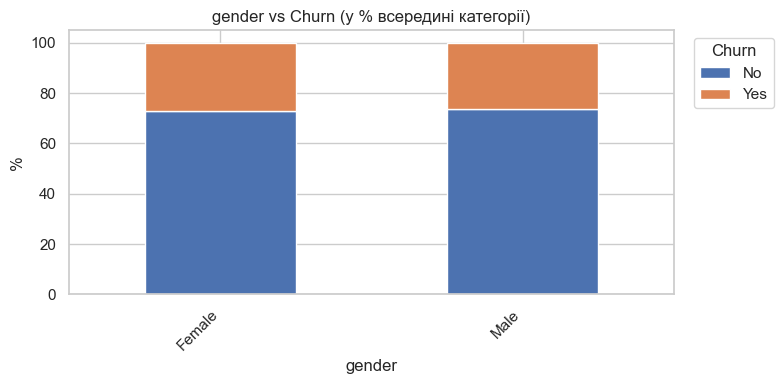

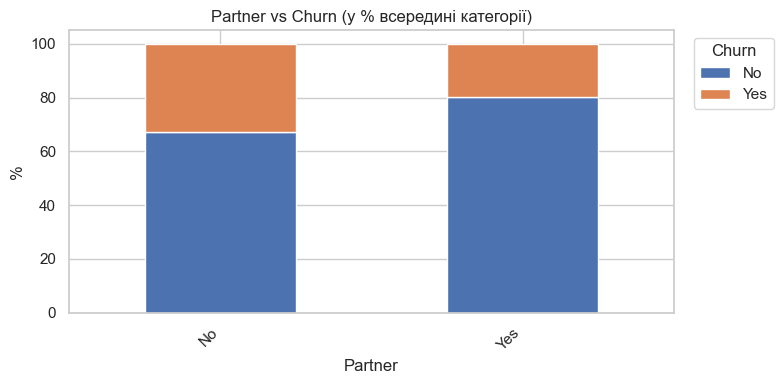

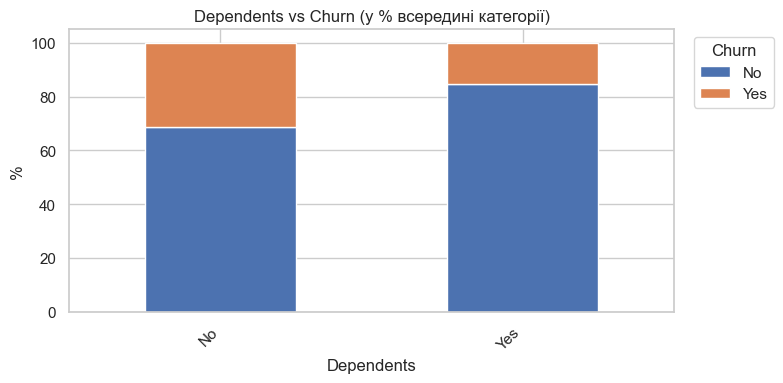

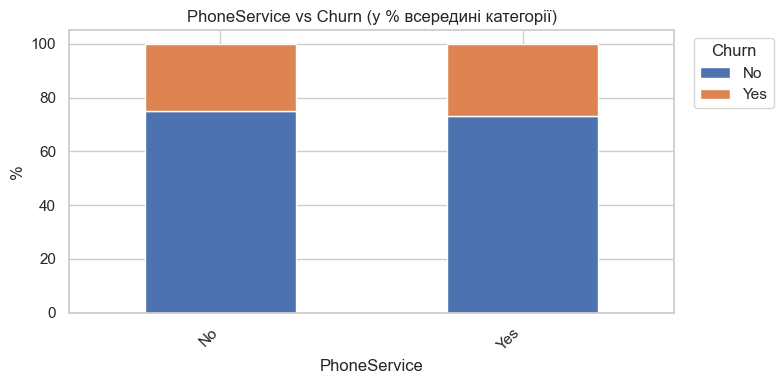

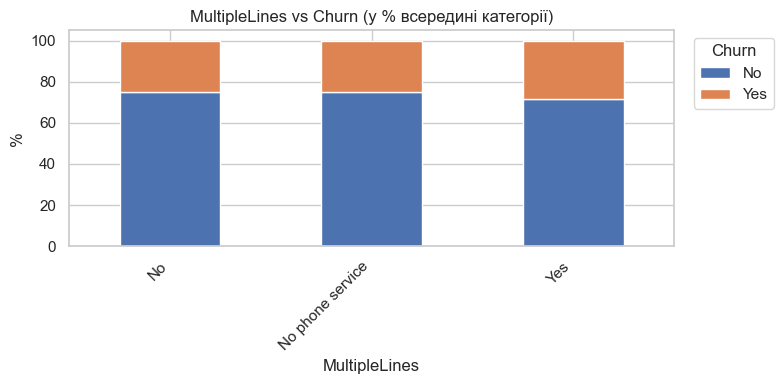

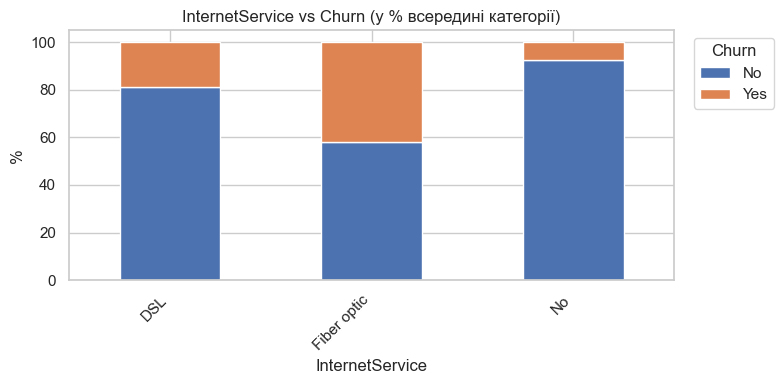

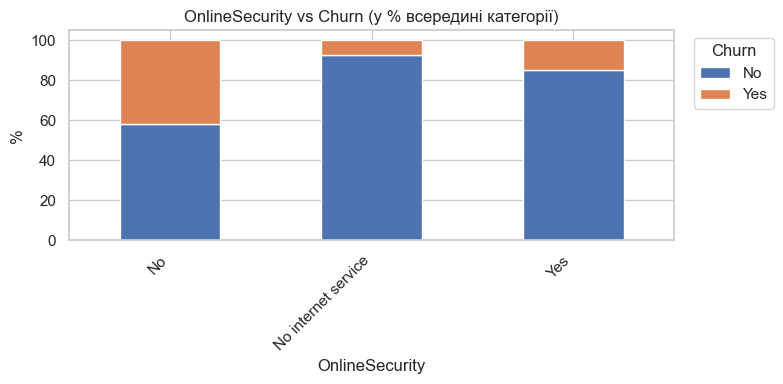

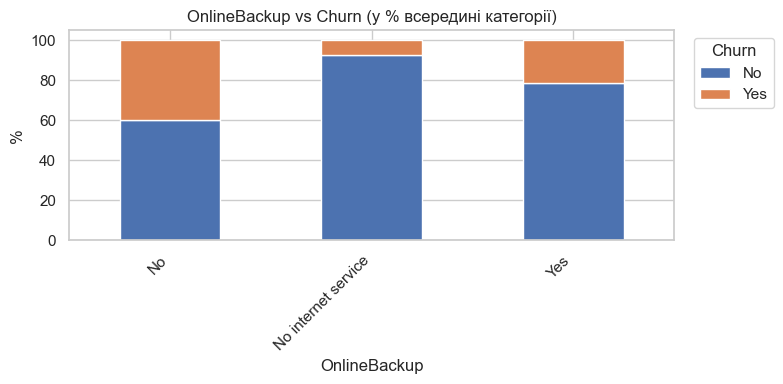

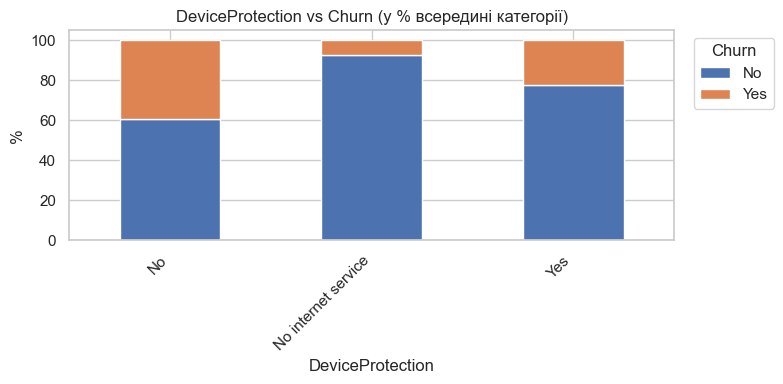

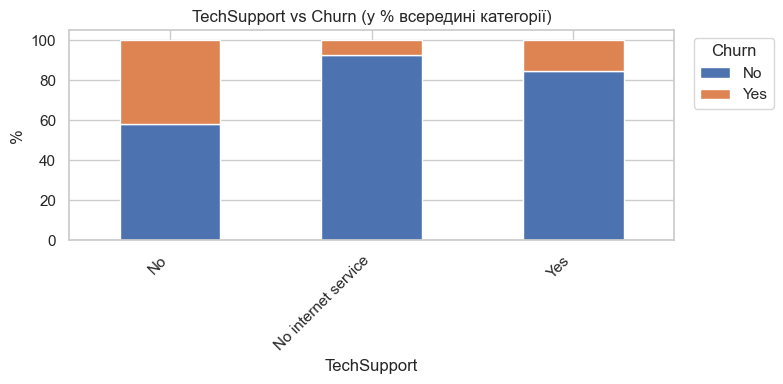

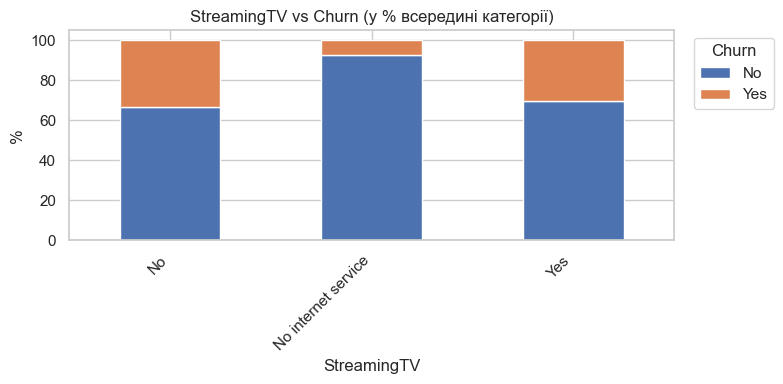

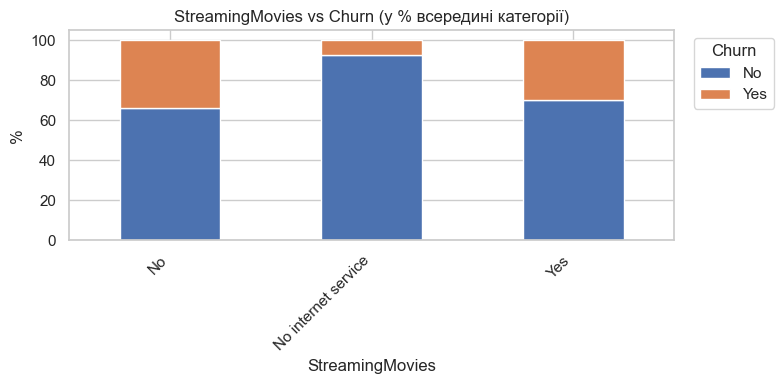

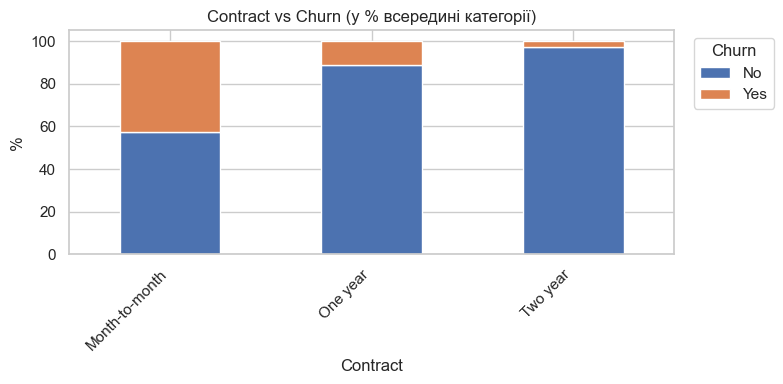

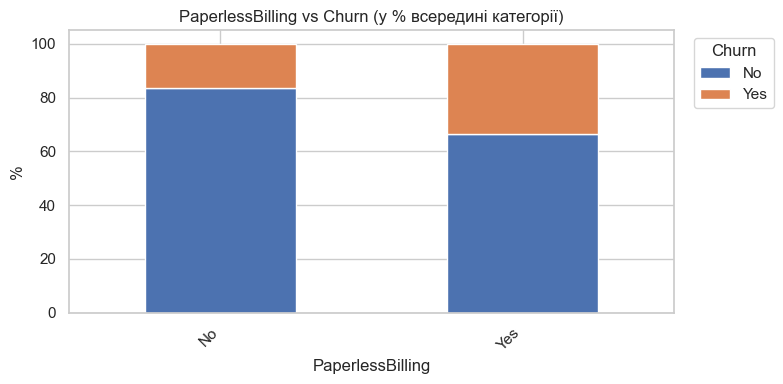

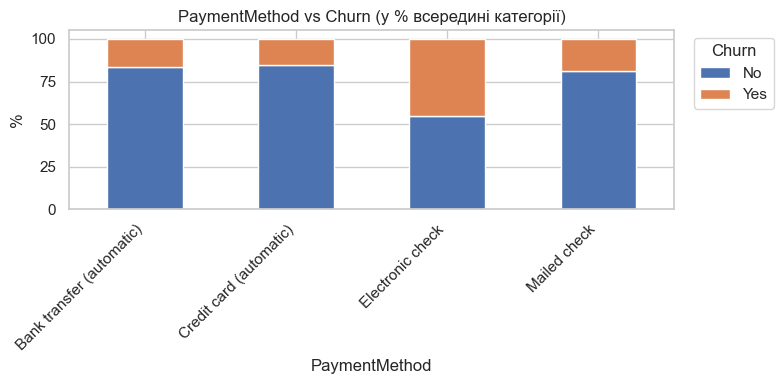

In [ ]:
# Візуалізація зв'язку категоріальних ознак із Churn (stacked percentage bar)
# Щоб не перевантажувати ноутбук, виберемо найтиповіші колонки
preferred_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

plot_cols = [c for c in preferred_cols if c in df_clean.columns and c in categorical_feature_cols]

for col in plot_cols:
    tmp = pd.crosstab(df_clean[col], df_clean[target_col], normalize="index") * 100
    tmp = tmp.sort_index()
    tmp.plot(kind="bar", stacked=True, figsize=(8,4))
    plt.title(f"{col} vs {target_col} (у % всередині категорії)")
    plt.ylabel("%")
    plt.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


### Категоріальні ознаки

Візуальний аналіз показує, що найбільш помітний зв’язок із churn мають:

- **`Contract`**: клієнти з тарифом **`Month-to-month`** мають значно вищу частку відтоку, ніж клієнти з `One year` / `Two year`.
- **`InternetService`**: у групі **`Fiber optic`** частка churn помітно вища, ніж у `DSL` та `No`.
- **`OnlineSecurity`** і **`TechSupport`**: відсутність цих сервісів (`No`) пов’язана з вищою часткою churn.
- **`PaperlessBilling`**: у клієнтів із `Yes` частка churn вища.
- **`PaymentMethod`**: категорія **`Electronic check`** виглядає ризиковішою щодо churn.

Водночас ознака **`gender`** не демонструє вираженої різниці між класами, тобто її вплив, ймовірно, слабший.

## 10. Кореляційна матриця (числові ознаки)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


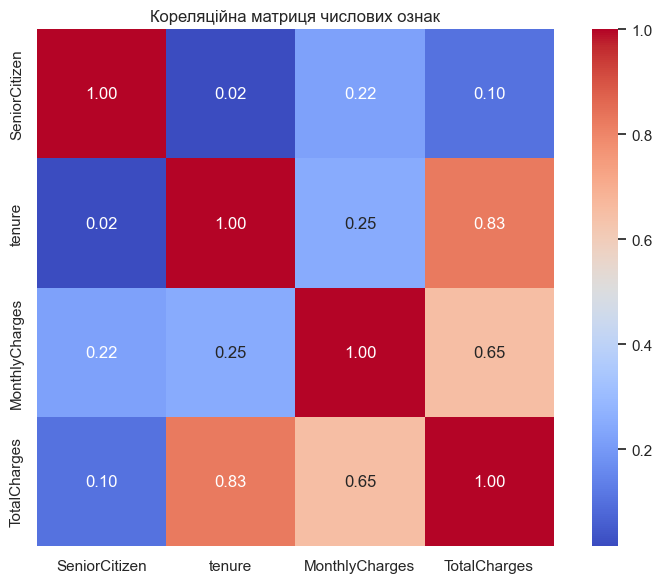

In [15]:
if numeric_feature_cols:
    corr = df_clean[numeric_feature_cols].corr(numeric_only=True)
    display(corr)

    plt.figure(figsize=(8,6))
    if HAS_SEABORN:
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    else:
        plt.imshow(corr, aspect="auto")
        plt.colorbar()
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
        plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Кореляційна матриця числових ознак")
    plt.tight_layout()
    plt.show()
else:
    print("Числових ознак недостатньо для кореляційної матриці.")


### Кореляції числових ознак

- Найсильніший зв’язок спостерігається між **`tenure`** та **`TotalCharges`** (**~0.83**), що логічно: чим довше клієнт користується послугами, тим більша сумарна оплата.
- Помірний зв’язок є між **`MonthlyCharges`** та **`TotalCharges`** (**~0.65**).
- Зв’язок між `tenure` та `MonthlyCharges` слабкий/помірний (**~0.25**).
- `SeniorCitizen` має слабкі кореляції з іншими числовими ознаками.

Ці результати не є проблемою для деревоподібних моделей (наприклад, RandomForest), але їх корисно врахувати при інтерпретації ознак.

## 11. Висновки

### 1. Загальна інформація про дані
- Розмір датасету: **7043 рядки, 21 колонка**.
- Цільова змінна: **`Churn`** (задача класифікації).
- Типи ознак (після базового очищення, без target та ID):
  - **4 числові**
  - **15 категоріальних**

### 2. Якість даних
- Виявлені проблеми:
  - колонка **`TotalCharges`** була у форматі `object` замість числового;
  - наявні порожні значення/рядки, які після очищення перетворено на `NaN`;
  - знайдено **11 пропусків (0.16%)** у `TotalCharges`.
- Дублікати:
  - повних дублікатів рядків — **0**
  - дублікатів `customerID` — **0**
- Прийняті рішення:
  - обрізати пробіли у текстових значеннях;
  - конвертувати `TotalCharges` у числовий тип;
  - обробляти пропуски в `TotalCharges` під час навчання моделі через pipeline (`SimpleImputer`).

### 3. Цільова змінна
- Розподіл класів:
  - **No — 5174 (73.46%)**
  - **Yes — 1869 (26.54%)**
- Висновок: у даних є **помірний дисбаланс класів**, тому для оцінки моделі потрібно використовувати не лише `accuracy`, а й `f1`, `precision`, `recall` (за можливості також `roc_auc`).

### 4. Попередні спостереження (EDA)
- Потенційно важливі числові ознаки:
  - `tenure`
  - `MonthlyCharges`
  - `TotalCharges`
- Потенційно важливі категоріальні ознаки:
  - `Contract`
  - `InternetService`
  - `OnlineSecurity`
  - `TechSupport`
  - `PaperlessBilling`
  - `PaymentMethod`
- Виявлені закономірності:
  - клієнти з меншим `tenure` частіше мають `Churn = Yes`;
  - у клієнтів з churn частіше вищі `MonthlyCharges`;
  - контракт `Month-to-month` пов’язаний із вищою часткою churn;
  - відсутність `OnlineSecurity` / `TechSupport` корелює з вищим churn;
  - метод оплати `Electronic check` і `PaperlessBilling = Yes` також асоціюються з вищим churn.

### 5. Що буде реалізовано в `train.py`
- Видалення ID-колонки `customerID`
- Розділення даних на `X` та `y`
- `train_test_split`
- Передобробка через `ColumnTransformer`:
  - числові ознаки → імпутація пропусків
  - категоріальні ознаки → імпутація + `OneHotEncoder`
- Навчання baseline-моделі (наприклад, `RandomForestClassifier`)
- Логування параметрів, метрик і моделі через **MLflow**

## 12. Збереження очищеної копії для подальших кроків

In [ ]:
SAVE_CLEAN_COPY = True

if SAVE_CLEAN_COPY:
    out_dir = Path("../data/processed")
    out_dir.mkdir(parents=True, exist_ok=True)
    out_path = out_dir / "telco_clean_for_eda_preview.csv"
    df_clean.to_csv(out_path, index=False)
    print(f"Збережено: {out_path.resolve()}")
else:
    print("Збереження вимкнено (це нормально).")


Збережено: /Users/ivanka/Documents/UNIVER/Semester8/Lab1_arhitecture/data/processed/telco_clean_for_eda_preview.csv
